In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import dataset 
df = pd.read_csv(r'D:\Magang M-Knows\dummy_data.csv')
df.head(10)

,name,purchasehistory,loc,deviceinformation,timeofday,transactionamount,paymentmethod,velocity,IPaddress,sessionduration,behavioralbio,commhistory,socialmediahistory,priority,target
0,Samsul Wibowo,1,1,0,1,3,1,1,5.180.25.36,3,1,1,0,0,0
1,R. Latika Narpati,2,3,2,0,2,0,2,142.176.87.125,3,2,2,0,1,0
2,Karimah Tarihoran,0,3,3,0,0,3,0,48.1.156.7,0,1,1,1,0,1
3,"Ganjaran Samosir, S.E.",0,0,1,1,3,3,2,61.170.196.92,2,1,0,1,0,0
4,"Jaiman Sitompul, S.T.",0,0,0,1,2,2,0,212.165.46.102,1,0,1,0,1,0
5,R. Janet Zulaika,0,1,3,3,0,3,1,212.154.55.91,1,0,0,0,1,1
6,Amelia Mahendra,0,1,4,0,3,2,2,2.34.123.209,0,0,1,0,1,1
7,Langgeng Susanti,2,0,5,0,1,0,1,223.4.124.11,0,3,1,1,1,0
8,H. Niyaga Ramadan,2,3,4,0,0,1,1,89.126.207.64,1,0,0,1,0,1
9,Upik Uyainah,1,1,0,3,1,2,1,219.158.147.63,2,1,0,0,1,0


In [ ]:
df_vis = df.copy()

In [ ]:
#transform data
df_vis['purchasehistory'] = df_vis['purchasehistory'].replace({0: 'Phone', 1: 'Luxury Bag', 2: 'Watch', 3: 'clothes' })
df_vis['loc'] = df_vis['loc'].replace({0: 'flats', 1: 'Apartments', 2:'Elite Housing', 3:'Rent House'})
df_vis['deviceinformation'] = df_vis['deviceinformation'].replace({0: 'iPhone', 1: 'iPad', 2: 'MacBook', 3: 'iMac', 4: 'Samsung', 5: 'Ovo', 6: 'Vivo'})
df_vis['timeofday'] = df_vis['timeofday'].replace({0: 'Morning', 1: 'Afternoon', 2: 'Evening', 3: 'Night'})
df_vis['transactionamount'] = df_vis['transactionamount'].replace({0: '<5 jt', 1: '5-10 jt', 2: '10-15 jt', 3: '>15 jt'})
df_vis['paymentmethod'] = df_vis['paymentmethod'].replace({0: 'Debit Card', 1: 'Credit Card', 2: 'Prepaid Card', 3: 'Bank Transfers', 4: 'Cash'})
df_vis['velocity'] = df_vis['velocity'].replace({0: 'Low', 1: 'Medium', 2: 'High'})
df_vis['sessionduration'] = df_vis['sessionduration'].replace({0: '<5 hours', 1 : '5-10 hours', 2: '10-15 hours', 3: '>15 hours'})
df_vis['behavioralbio'] = df_vis['behavioralbio'].replace({0: 'Bad', 1: 'Nomal', 2: 'Good', 3: 'Great'})
df_vis['commhistory'] = df_vis['commhistory'].replace({0: 'Once', 1: 'Seldom', 2:'Often'})
df_vis['socialmediahistory'] = df_vis['socialmediahistory'].replace({0: 'Passive', 1: 'Active'})
df_vis['priority'] = df_vis['priority'].replace({0: 'No', 1: 'Yes'})
df_vis['target'] = df_vis['target'].replace({0: 'No Fraud', 1: 'Is Fraud'})

In [ ]:
df_vis.head()

,name,purchasehistory,loc,deviceinformation,timeofday,transactionamount,paymentmethod,velocity,IPaddress,sessionduration,behavioralbio,commhistory,socialmediahistory,priority,target
0,Samsul Wibowo,Luxury Bag,Apartments,iPhone,Afternoon,>15 jt,Credit Card,Medium,5.180.25.36,>15 hours,Nomal,Seldom,Passive,No,No Fraud
1,R. Latika Narpati,Watch,Rent House,MacBook,Morning,10-15 jt,Debit Card,High,142.176.87.125,>15 hours,Good,Often,Passive,Yes,No Fraud
2,Karimah Tarihoran,Phone,Rent House,iMac,Morning,<5 jt,Bank Transfers,Low,48.1.156.7,<5 hours,Nomal,Seldom,Active,No,Is Fraud
3,"Ganjaran Samosir, S.E.",Phone,flats,iPad,Afternoon,>15 jt,Bank Transfers,High,61.170.196.92,10-15 hours,Nomal,Once,Active,No,No Fraud
4,"Jaiman Sitompul, S.T.",Phone,flats,iPhone,Afternoon,10-15 jt,Prepaid Card,Low,212.165.46.102,5-10 hours,Bad,Seldom,Passive,Yes,No Fraud


In [ ]:
# df_vis.to_csv('datafraudindividual.csv', index=False)

In [ ]:
df['commhistory'] = df['commhistory'].astype(int)
df['purchasehistory'] = df['purchasehistory'].astype(int)
df['loc'] = df['loc'].astype(int)
df['timeofday'] = df['timeofday'].astype(int)
df['deviceinformation'] = df['deviceinformation'].astype(int)
df['transactionamount'] = df['transactionamount'].astype(int)
df['paymentmethod'] = df['paymentmethod'].astype(int)
df['velocity'] = df['velocity'].astype(int)
df['sessionduration'] = df['sessionduration'].astype(int)
df['behavioralbio'] = df['behavioralbio'].astype(int)
df['socialmediahistory'] = df['socialmediahistory'].astype(int)
df['priority'] = df['priority'].astype(int)
df['target'] = df['target'].astype(int)

In [ ]:
df2 = pd.DataFrame({'deviceinformation': df['deviceinformation'], 'transactionamount': df['transactionamount'], 'paymentmethod': df['paymentmethod'], 'velocity': df['velocity'], 'sessionduration': df['sessionduration'], 'behavioralbio': df['behavioralbio'], 'socialmediahistory': df['socialmediahistory'], 'priority': df['priority'], 'loc' : df['loc'], 'purchasehistory' : df['purchasehistory'], 'timeofday' : df['timeofday'], 'commhistory' : df['commhistory'] , 'target' : df['target']})
df2

,deviceinformation,transactionamount,paymentmethod,velocity,sessionduration,behavioralbio,socialmediahistory,priority,loc,purchasehistory,timeofday,commhistory,target
0,0,3,1,1,3,1,0,0,1,1,1,1,0
1,2,2,0,2,3,2,0,1,3,2,0,2,0
2,3,0,3,0,0,1,1,0,3,0,0,1,1
3,1,3,3,2,2,1,1,0,0,0,1,0,0
4,0,2,2,0,1,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,5,1,3,0,3,2,0,0,0,0,1,1,0
996,4,1,3,2,0,0,0,0,1,1,0,1,1
997,6,1,3,0,2,0,1,0,3,3,2,2,0
998,0,0,3,1,0,3,1,0,0,1,1,0,1


EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                1000 non-null   object
 1   purchasehistory     1000 non-null   int32 
 2   loc                 1000 non-null   int32 
 3   deviceinformation   1000 non-null   int32 
 4   timeofday           1000 non-null   int32 
 5   transactionamount   1000 non-null   int32 
 6   paymentmethod       1000 non-null   int32 
 7   velocity            1000 non-null   int32 
 8   IPaddress           1000 non-null   object
 9   sessionduration     1000 non-null   int32 
 10  behavioralbio       1000 non-null   int32 
 11  commhistory         1000 non-null   int32 
 12  socialmediahistory  1000 non-null   int32 
 13  priority            1000 non-null   int32 
 14  target              1000 non-null   int32 
dtypes: int32(13), object(2)
memory usage: 66.5+ KB


In [ ]:
df.describe()

,purchasehistory,loc,deviceinformation,timeofday,transactionamount,paymentmethod,velocity,sessionduration,behavioralbio,commhistory,socialmediahistory,priority,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.453000,1.529000,3.007000,1.497000,1.490000,1.533000,1.001000,1.48000,1.530000,1.006000,0.511000,0.498000,0.487000
std,1.114016,1.119112,2.004737,1.119484,1.085854,1.103689,0.814655,1.13441,1.117295,0.807847,0.500129,0.500246,0.500081
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.00000,2.000000,1.000000,1.000000,0.000000,0.000000
75%,2.000000,3.000000,5.000000,2.000000,2.000000,2.250000,2.000000,3.00000,3.000000,2.000000,1.000000,1.000000,1.000000
max,3.000000,3.000000,6.000000,3.000000,3.000000,3.000000,2.000000,3.00000,3.000000,2.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

name                  0
purchasehistory       0
loc                   0
deviceinformation     0
timeofday             0
transactionamount     0
paymentmethod         0
velocity              0
IPaddress             0
sessionduration       0
behavioralbio         0
commhistory           0
socialmediahistory    0
priority              0
target                0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(1000, 15)

In [ ]:
unique_values = {}
for col in df_vis.columns:
    unique_values[col] = df_vis[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
name,997
purchasehistory,4
loc,4
deviceinformation,7
timeofday,4
transactionamount,4
paymentmethod,4
velocity,3
IPaddress,1000
sessionduration,4


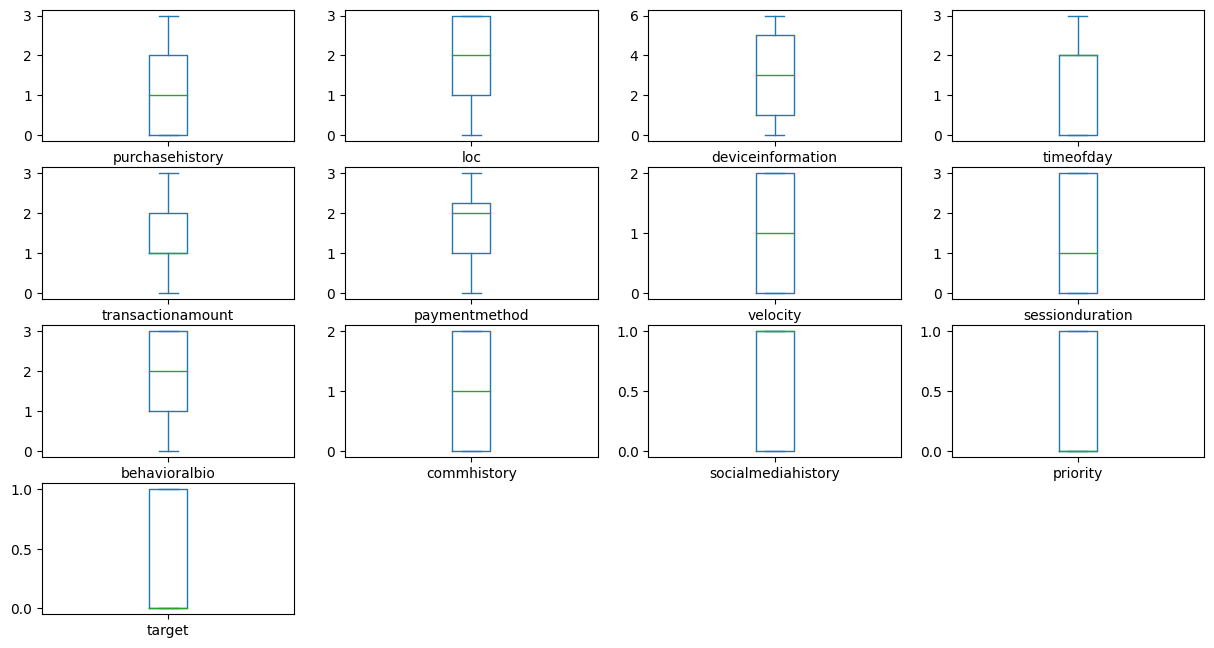

In [ ]:
import matplotlib.pyplot as plt
df.plot(kind="box", subplots=True, layout=(7,4), figsize=(15,14));

In [ ]:
#Uji Korelasi

correlation = df2.corr(method='pearson')
correlation

,deviceinformation,transactionamount,paymentmethod,velocity,sessionduration,behavioralbio,socialmediahistory,priority,loc,purchasehistory,timeofday,commhistory,target
deviceinformation,1.000000,-0.046182,-0.012998,-0.006746,-0.055618,0.015324,0.011404,0.012491,0.001917,0.045641,0.023426,-0.025367,-0.036353
transactionamount,-0.046182,1.000000,-0.004318,0.006235,-0.019666,-0.016254,0.041676,0.038662,-0.014177,-0.034730,0.062147,0.030879,0.015429
paymentmethod,-0.012998,-0.004318,1.000000,0.035032,-0.029454,-0.041797,0.012036,-0.017104,-0.042918,-0.042701,0.043019,-0.014817,0.020728
velocity,-0.006746,0.006235,0.035032,1.000000,0.008145,-0.017079,0.006115,0.003689,-0.022540,-0.021456,0.015918,0.001512,-0.042967
sessionduration,-0.055618,-0.019666,-0.029454,0.008145,1.000000,-0.042173,-0.004023,0.017569,0.000063,-0.009854,0.020840,0.005592,0.018069
behavioralbio,0.015324,-0.016254,-0.041797,-0.017079,-0.042173,1.000000,-0.083890,-0.030339,-0.012305,0.028880,-0.030739,-0.016835,0.030259
socialmediahistory,0.011404,0.041676,0.012036,0.006115,-0.004023,-0.083890,1.000000,-0.029919,0.072756,-0.017038,0.030453,-0.027417,-0.003430
priority,0.012491,0.038662,-0.017104,0.003689,0.017569,-0.030339,-0.029919,1.000000,0.009938,0.024080,0.049144,0.061954,0.025905
loc,0.001917,-0.014177,-0.042918,-0.022540,0.000063,-0.012305,0.072756,0.009938,1.000000,0.002700,0.025637,-0.027873,0.022138
purchasehistory,0.045641,-0.034730,-0.042701,-0.021456,-0.009854,0.028880,-0.017038,0.024080,0.002700,1.000000,0.012729,0.023672,0.007886


<AxesSubplot:>

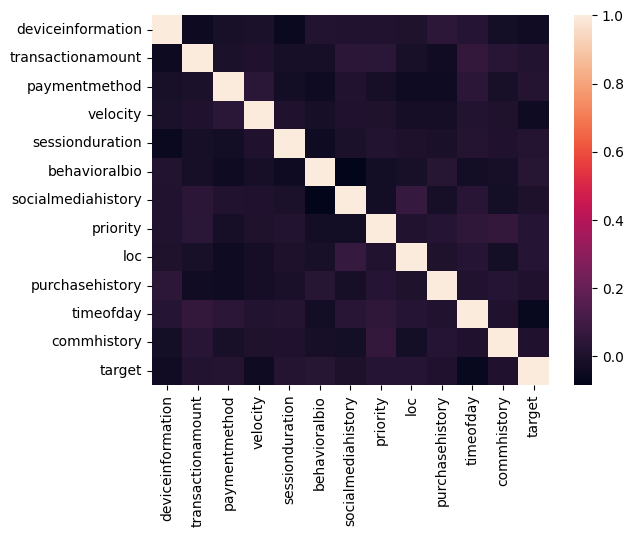

In [ ]:
import seaborn as sns
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

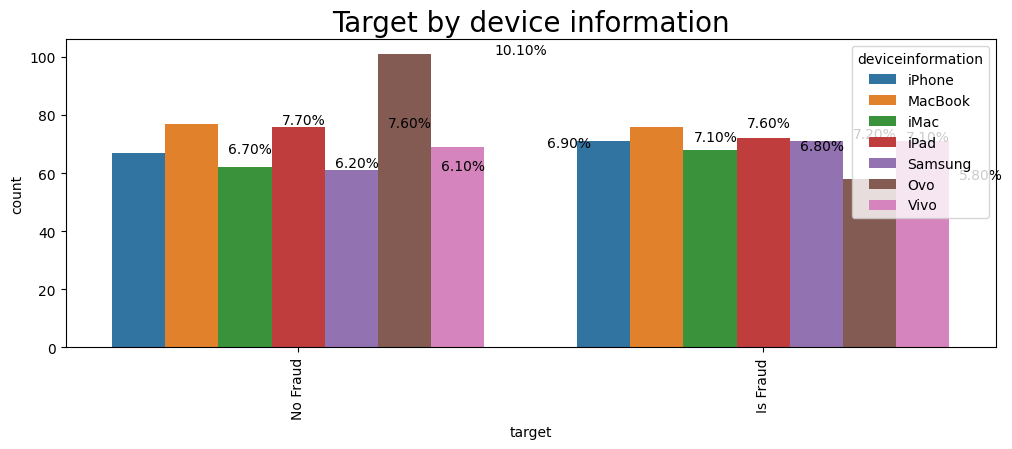

In [ ]:
#Visualisasi Interaktif
plt.figure(figsize=(12,4))
x= sns.countplot(x='target',data=df_vis,hue='deviceinformation')
plt.xticks(rotation=90)
plt.title('Target by device information',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

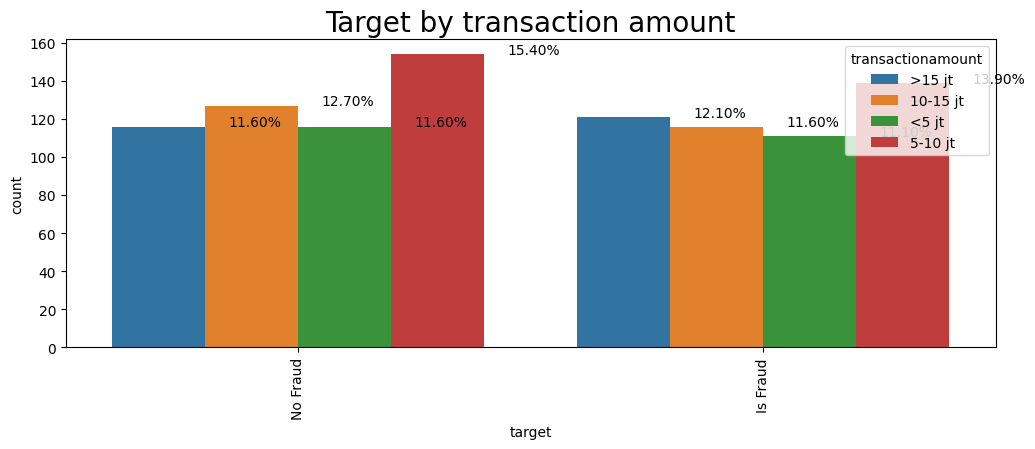

In [ ]:
#Visualisasi Interaktif
plt.figure(figsize=(12,4))
x= sns.countplot(x='target',data=df_vis,hue='transactionamount')
plt.xticks(rotation=90)
plt.title('Target by transaction amount',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

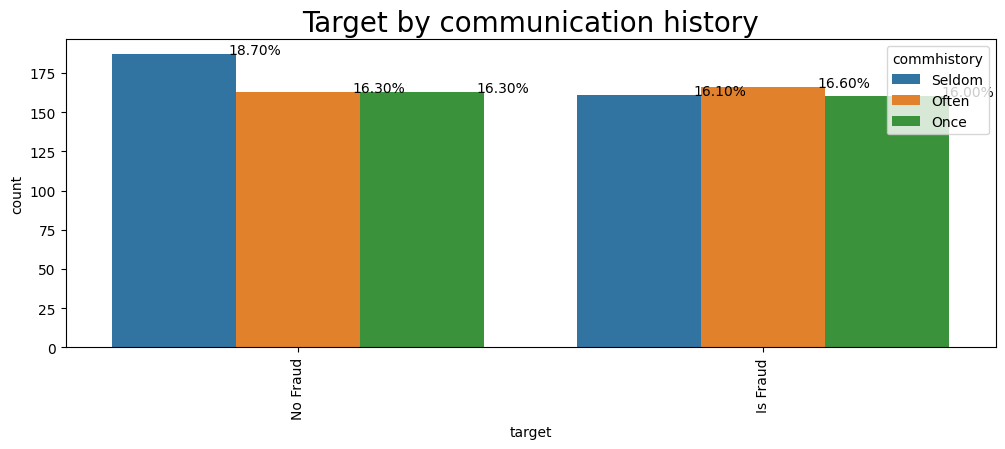

In [ ]:
#Visualisasi Interaktif
plt.figure(figsize=(12,4))
x= sns.countplot(x='target',data=df_vis,hue='commhistory')
plt.xticks(rotation=90)
plt.title('Target by communication history',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

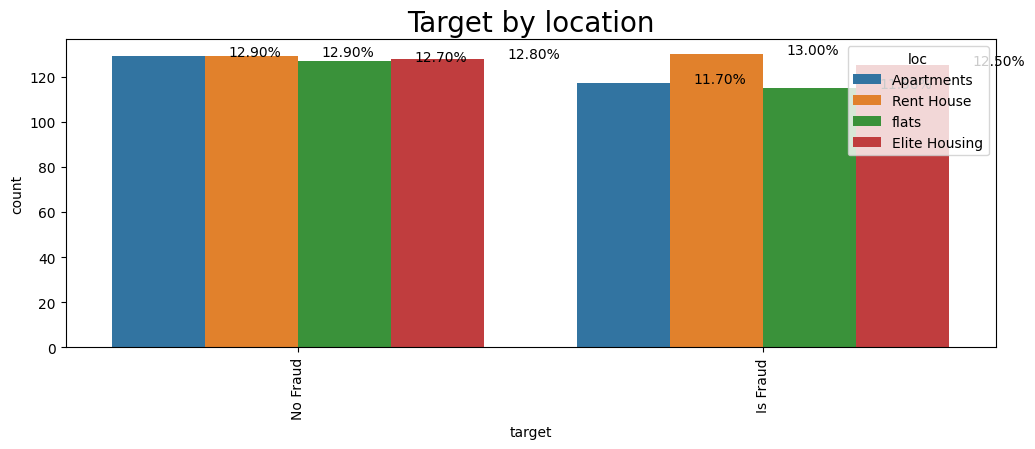

In [ ]:
#Visualisasi Interaktif
plt.figure(figsize=(12,4))
x= sns.countplot(x='target',data=df_vis,hue='loc')
plt.xticks(rotation=90)
plt.title('Target by location',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

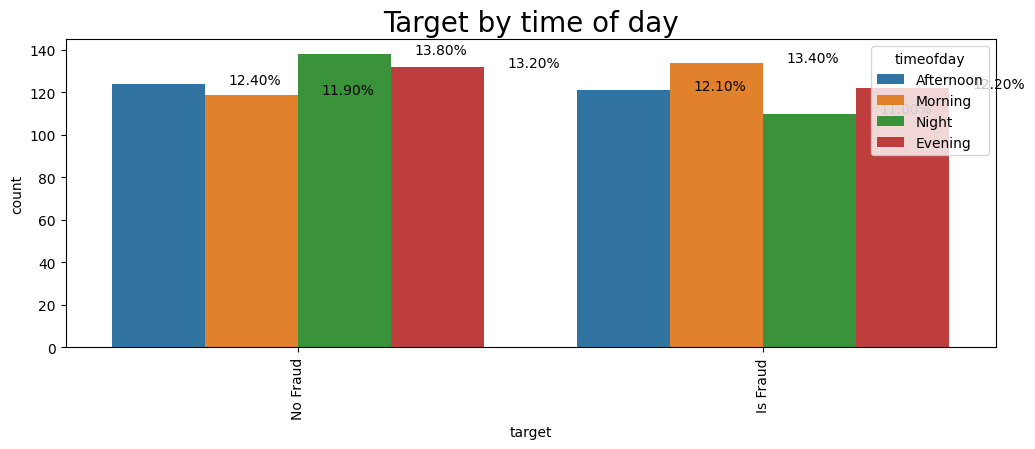

In [ ]:
#Visualisasi Interaktif
plt.figure(figsize=(12,4))
x= sns.countplot(x='target',data=df_vis,hue='timeofday')
plt.xticks(rotation=90)
plt.title('Target by time of day',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

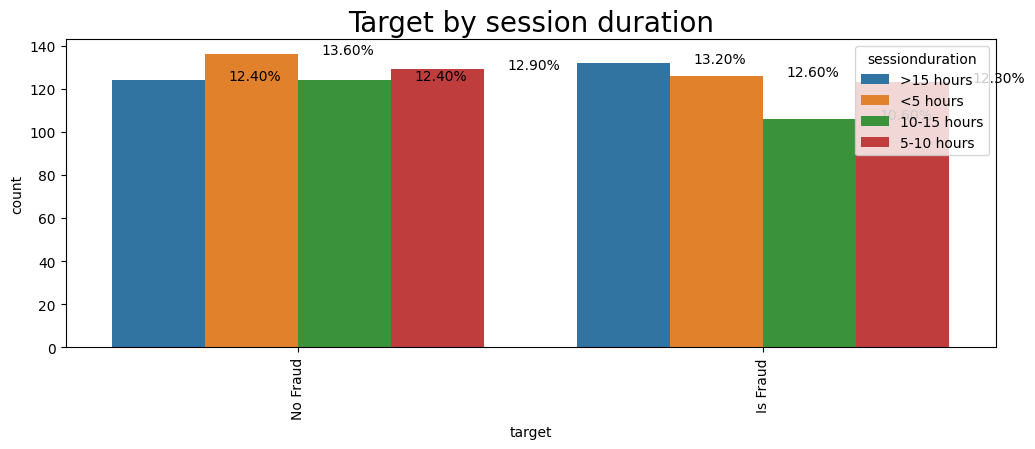

In [ ]:
#Visualisasi Interaktif
plt.figure(figsize=(12,4))
x= sns.countplot(x='target',data=df_vis,hue='sessionduration')
plt.xticks(rotation=90)
plt.title('Target by session duration',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

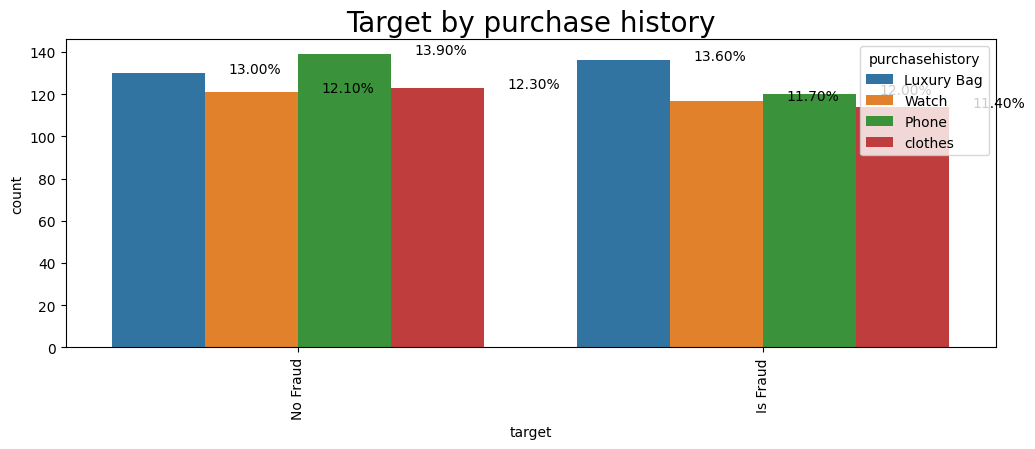

In [ ]:
#Visualisasi Interaktif
plt.figure(figsize=(12,4))
x= sns.countplot(x='target',data=df_vis,hue='purchasehistory')
plt.xticks(rotation=90)
plt.title('Target by purchase history',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

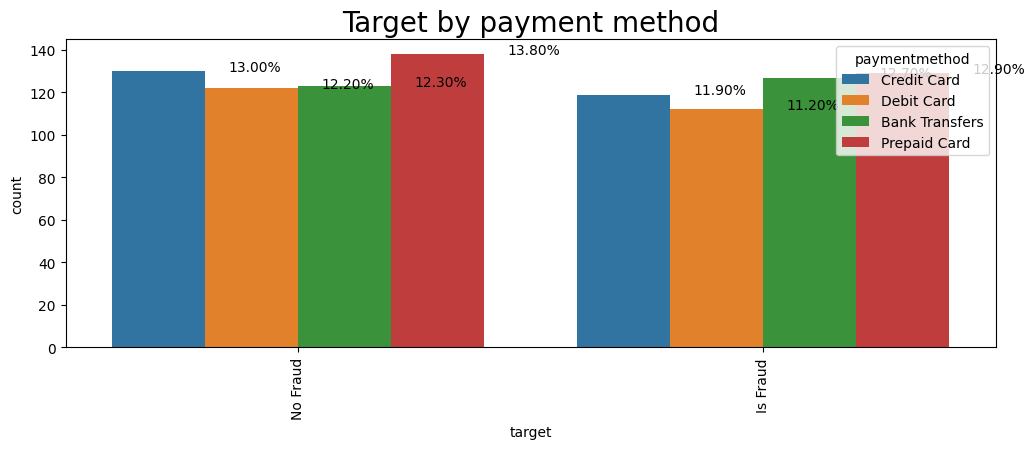

In [ ]:
#Visualisasi Interaktif
plt.figure(figsize=(12,4))
x= sns.countplot(x='target',data=df_vis,hue='paymentmethod')
plt.xticks(rotation=90)
plt.title('Target by payment method',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

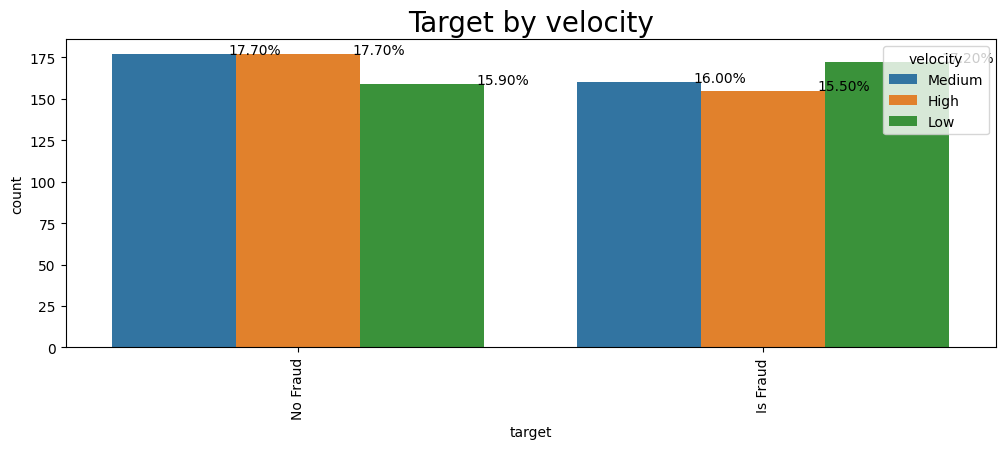

In [ ]:
#Visualisasi Interaktif
plt.figure(figsize=(12,4))
x= sns.countplot(x='target',data=df_vis,hue='velocity')
plt.xticks(rotation=90)
plt.title('Target by velocity',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

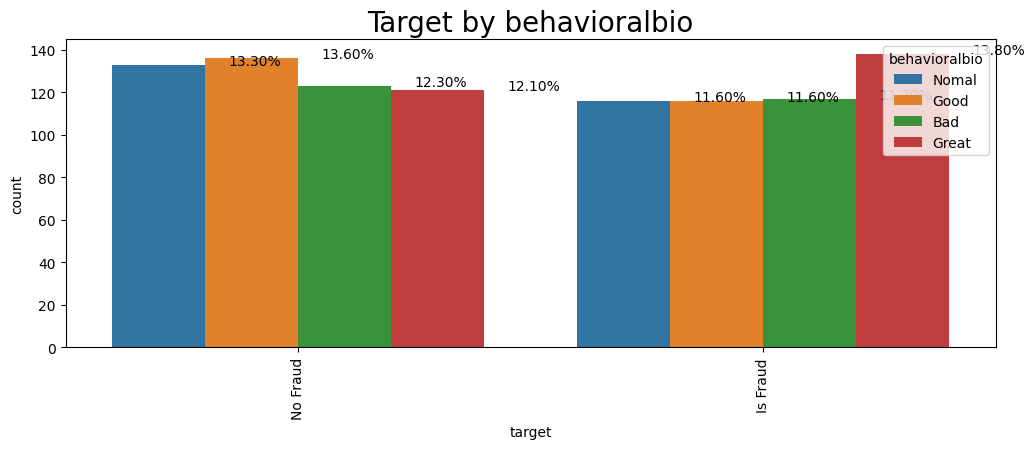

In [ ]:
#Visualisasi Interaktif
plt.figure(figsize=(12,4))
x= sns.countplot(x='target',data=df_vis,hue='behavioralbio')
plt.xticks(rotation=90)
plt.title('Target by behavioralbio',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

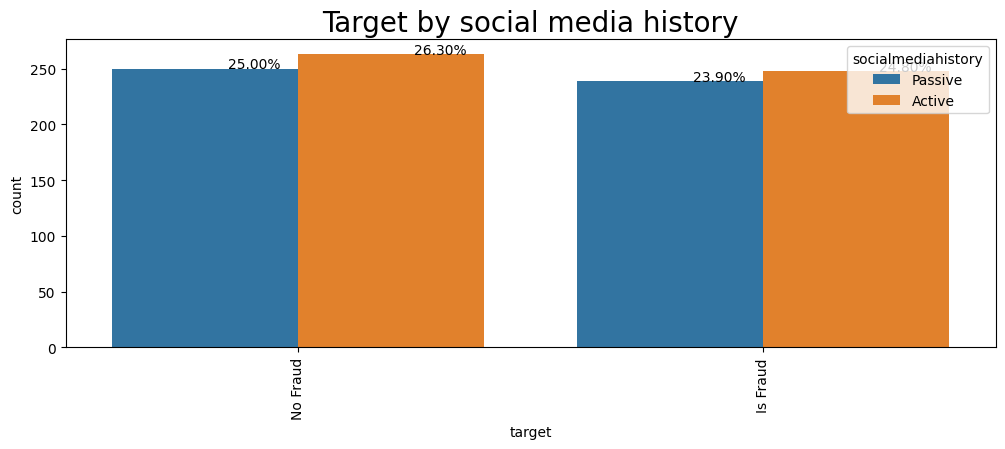

In [ ]:
#Visualisasi Interaktif
plt.figure(figsize=(12,4))
x= sns.countplot(x='target',data=df_vis,hue='socialmediahistory')
plt.xticks(rotation=90)
plt.title('Target by social media history',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

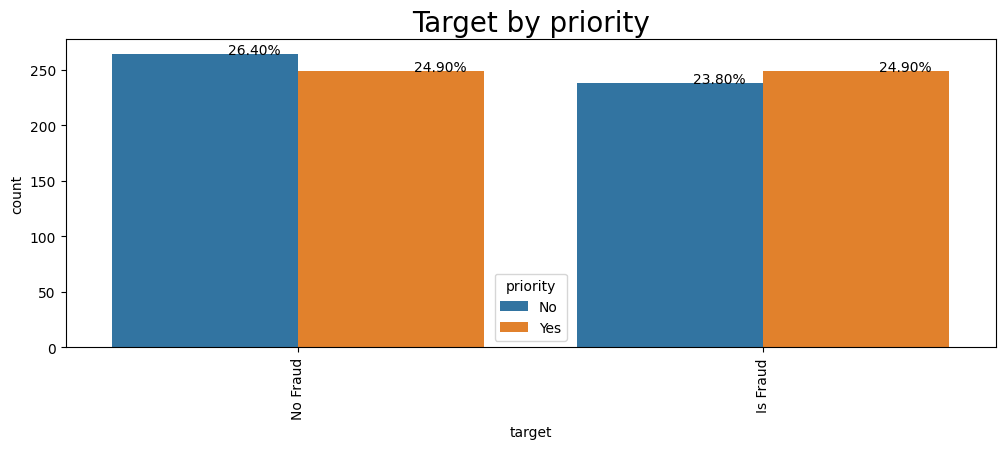

In [ ]:
#Visualisasi Interaktif
plt.figure(figsize=(12,4))
x= sns.countplot(x='target',data=df_vis,hue='priority')
plt.xticks(rotation=90)
plt.title('Target by priority',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/df_vis.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

UJI ASUMSI

Uji Normalitas
Jika sampel (n) < 50 gunakan shapiro wilk, tetapi jika n > 50 gunakan kolmogorov smirnov

Ho : Data berdistribusi normal
H1 : Data tidak berdistribusi normal

Kriteria uji: Tolak Ho jika pvalue < 0.05 terima dalam hal lainnya

In [ ]:
#Uji Asumsi Normalitas
import numpy as np
from scipy.stats import kstest

# Loop over columns of df2 and perform KS test on each
for col in df2.columns:
    test_statistic, p_value = kstest(df2[col], 'norm')
    print(f"Column: {col}")
    print("Test statistic:", test_statistic)
    print("P-value:", p_value)

Column: deviceinformation
Test statistic: 0.7033447460685429
P-value: 0.0
Column: transactionamount
Test statistic: 0.614344746068543
P-value: 0.0
Column: paymentmethod
Test statistic: 0.6073447460685429
P-value: 0.0
Column: velocity
Test statistic: 0.5103447460685429
P-value: 4.36603191930504e-242
Column: sessionduration
Test statistic: 0.5793447460685429
P-value: 5.73156e-319
Column: behavioralbio
Test statistic: 0.6013447460685429
P-value: 0.0
Column: socialmediahistory
Test statistic: 0.5
P-value: 1.064517291557782e-231
Column: priority
Test statistic: 0.5
P-value: 1.064517291557782e-231
Column: loc
Test statistic: 0.5993447460685429
P-value: 0.0
Column: purchasehistory
Test statistic: 0.5823447460685429
P-value: 1.2e-322
Column: timeofday
Test statistic: 0.5883447460685429
P-value: 0.0
Column: commhistory
Test statistic: 0.5183447460685429
P-value: 2.586574057405323e-250
Column: target
Test statistic: 0.5
P-value: 1.064517291557782e-231


Karena masing-masing variabel memiliki p-value < 0.05 maka data tidak normal dan perlu dilakukan trasnformasi data

In [ ]:
# Transformasi Data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df2)

Uji Homogenitas Varians

Untuk menghitung nilai eigen dan vektor eigen
Jika data memenuhi asumsi homogenitas varians, gunakan matriks varkov,
jika tidak terpenuhi gunakan matriks korelasi.

Ho : Matriks varians kovarians homogen
H1 : Matriks varians kovarians heterogen

Kriteria Uji: Tolak Ho jika pvalue < 0.05 dan terima dalam hal lainnya.

In [ ]:
# Uji Homogenitas Varians
from scipy.stats import bartlett

# convert each column of df2 to a one-dimensional array
data = [df2[col].values for col in df2.columns]

bartlett_test_statistic, p_value = bartlett(*data)
print("Test statistic:", bartlett_test_statistic)
print("P-value:", p_value)

Test statistic: 3749.718195779356
P-value: 0.0


In [ ]:
# Karena pvalue < 0.05 maka matriks varians heterogen (tidak memenuhi asumsi homogenitas) 

Split train (80%) and test data (20%)

In [ ]:
from sklearn.model_selection import train_test_split

y = df2['target']
x = df2.drop(['target'], axis=1)
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.20, random_state=44, shuffle =True)

In [ ]:
# Print the shapes of the training and testing sets
print("Training data shape: ", x_train.shape)
print("Testing data shape: ", x_test.shape)

Training data shape:  (800, 12)
Testing data shape:  (200, 12)


PRINCIPAL COMPONENT ANALYSIS

Split data jadi train dan test yang udah di transformasi (data sudah berdistribusi normal)

In [ ]:
# Transformasi Data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca =PCA()
pca.fit(x_train_scaled)

PCA()

In [ ]:
# Calculate the explained variance by components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [ ]:
pca.explained_variance_ratio_

array([0.09797633, 0.09682426, 0.09202132, 0.08941241, 0.08534768,
       0.08391569, 0.08066016, 0.07991606, 0.07724201, 0.07570869,
       0.0739289 , 0.06704648])

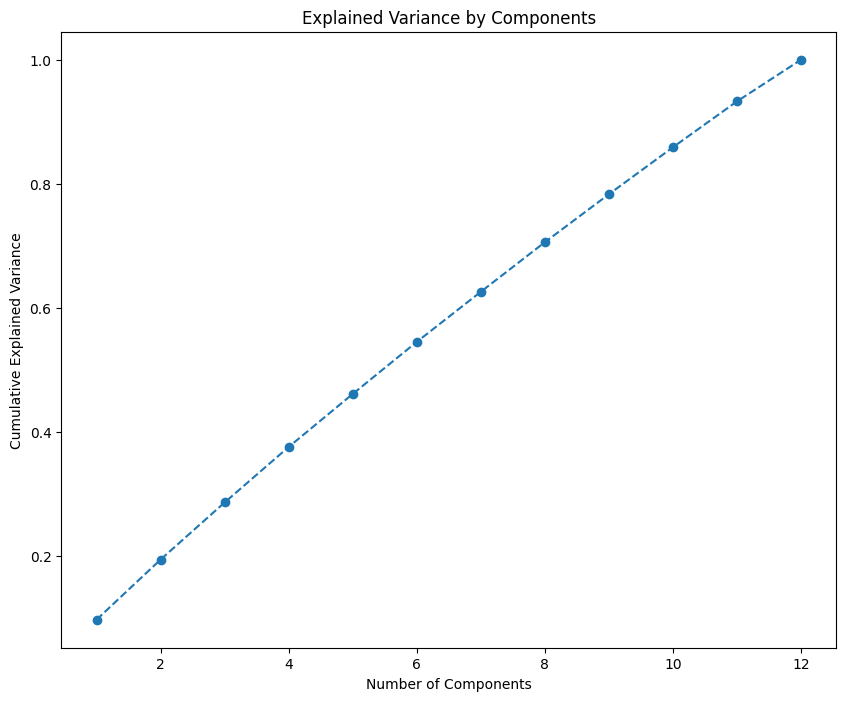

In [ ]:
# Plot the cumulative explained variance
plt.figure(figsize=(10,8))
plt.plot(range(1,len(cumulative_variance_ratio)+1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
print("Cumulative explained variance ratio:", cumulative_variance_ratio)

Cumulative explained variance ratio: [0.09797633 0.19480059 0.28682191 0.37623432 0.461582   0.5454977
 0.62615786 0.70607392 0.78331593 0.85902462 0.93295352 1.        ]


Berdasarkan hasil plot dan cumulative explained variance, dapat dilihat bahwa cumulative proportion (proporsi varians kumulatif) dari komponen utama pertama dapat menjelaskan 9% total varians, dan bila ditambahkan dengan komponen utama kesepeluh maka akan menjadi 85.90%. Artinya, apabila peneliti mengambil 10 komponen yaitu Komponen Utama Pertama, Kedua sampai kesepuluh maka sudah mencukupi karena nilai cumulative proportion nya sudah melebihi 80%. Sehingga, model persamaan variabel dependen terhadap komponen utama adalah 10 komponen.

In [ ]:
#We choose three component (>80%)
pca = PCA(n_components=10)

In [ ]:
#Fit the model
X_train_pca = pca.fit_transform(x_train_scaled)
X_test_pca = pca.transform(x_test_scaled)
scores_pca = pca.transform(x_train_scaled)

In [ ]:
pca_test = pca.transform(x_test_scaled)

In [ ]:
hasil_pca = pd.DataFrame(pca_test)
hasil_pca

,0,1,2,3,4,5,6,7,8,9
0,1.474089,0.338755,-1.708128,0.318129,0.980503,-1.529715,0.339548,1.239770,-0.874309,0.349790
1,-0.841038,-0.781137,-0.620407,-1.246092,-0.492768,-0.527299,-1.011143,0.485316,1.019989,0.492347
2,-1.470282,-0.130139,0.614916,1.011907,1.153313,0.019773,1.518690,-0.616720,1.254621,1.214329
3,-0.984265,-0.490654,0.175175,2.133449,0.044132,0.091947,0.979342,-1.384331,-0.456415,1.293213
4,1.772115,-0.188516,-0.236735,0.853061,-0.216448,0.794973,1.165969,0.639291,-1.491000,-0.357396
...,...,...,...,...,...,...,...,...,...,...
195,0.163490,-1.415787,-1.544858,0.152911,-0.483190,-0.859003,0.331763,-0.568771,-0.581870,0.346667
196,-0.583918,-0.377602,1.161616,-0.062797,1.651899,0.847600,0.596431,-0.176887,-1.732431,-0.165522
197,1.719756,0.290332,0.875180,-0.348638,-1.234883,-0.932585,-0.764868,1.075408,-0.518775,-0.394414
198,2.646287,-0.144551,0.565285,-0.138196,1.330820,0.162110,-0.469163,-0.797339,-1.030477,1.458901


evaluate the performance of the PCA model using cross-validation. 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create a logistic regression model
model = LogisticRegression()

# evaluate the performance using cross-validation
scores = cross_val_score(model, X_test_pca, y_test, cv=5)

# print the average score across all folds
print("Average cross-validation score:", np.mean(scores))


Average cross-validation score: 0.425


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# create a logistic regression model
model = LogisticRegression()

# evaluate the performance using cross-validation
scores = cross_val_score(model, X_train_pca, y_train, cv=5)

# print the average score across all folds
print("Average cross-validation score:", np.mean(scores))


Average cross-validation score: 0.52


K MEANS DENGAN PCA

In [ ]:
# K-means clustering with PCA
from sklearn.cluster import KMeans
# We fit K Means using the transformed data from the PCA
wcss = []
for i in range(1,10):
    kmeans_pca = KMeans(n_clusters=i, init= 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

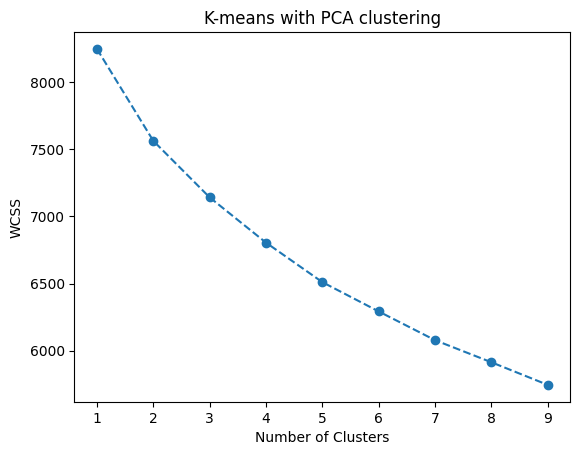

In [ ]:
plt.gca()
plt.plot(range(1,10), wcss, marker='o', linestyle= '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering')
plt.show()

In [ ]:
# We have chosen 2 clusters
# some initializer and random state as before
kmeans_pca = KMeans(n_clusters=2, init = "k-means++", random_state=42)

In [ ]:
# fit our data with kmeans pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=42)

In [ ]:
# Kmeans clustering with PCA result
# convert x_train_scaled to a pandas DataFrame
df_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)

In [ ]:
# K-Means with PCA result
# create a new df with the original features and add the PCA scores and assigned clusters
df_segm_pca_kmeans = pd.concat([df_train_scaled, pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-10:] = ['Component 1', 'Component 2', 'Component 3','Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Component 9', 'Component 10']
# the last column we add contains the pca k-means clustering labels
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans.head()

,deviceinformation,transactionamount,paymentmethod,velocity,sessionduration,behavioralbio,socialmediahistory,priority,loc,purchasehistory,...,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Segment K-means PCA
0,0.011191,0.439415,-0.471659,-0.021546,-1.337851,0.406602,0.980196,1.0,0.447002,-1.285159,...,0.352334,0.944405,0.114594,1.537964,0.416916,0.408832,0.109332,-1.486246,0.979421,0
1,0.508587,-0.478423,-0.471659,-0.021546,-1.337851,1.302693,-1.020204,-1.0,-1.354518,0.510696,...,1.387497,0.601772,0.725264,-0.502649,0.187812,0.095130,1.705226,-0.801425,0.243827,1
2,-0.486204,-0.478423,-1.380882,-1.252747,-1.337851,0.406602,-1.020204,-1.0,1.347762,-1.285159,...,0.099948,-0.461613,-1.527903,1.541910,0.133919,0.075622,1.076523,-1.383502,1.537815,1
3,0.508587,-1.396260,-0.471659,-1.252747,0.447438,-1.385582,0.980196,-1.0,0.447002,-1.285159,...,-1.215974,-1.650475,-1.105716,-0.585281,-0.761770,0.550728,0.367697,-2.125938,0.886326,0
4,-1.480996,0.439415,1.346787,-0.021546,-1.337851,-1.385582,0.980196,-1.0,-1.354518,0.510696,...,0.339226,-0.824687,1.407417,-0.050996,-1.734500,0.520277,0.914670,0.259421,0.417350,0


In [ ]:
print(df_segm_pca_kmeans['paymentmethod'].value_counts())

 0.437564    220
-0.471659    196
 1.346787    193
-1.380882    191
Name: paymentmethod, dtype: int64


In [ ]:
# reverse the scaling using the inverse_transform method
original_x_train = scaler.inverse_transform(df_train_scaled)
df_original_x_train = pd.DataFrame(original_x_train, columns= x_train.columns)
df_original_x_train['paymentmethod'].value_counts()

2.0    220
1.0    196
3.0    193
0.0    191
Name: paymentmethod, dtype: int64

transformasi:

purchase history = -1.285159: Phone, -0.387231: Luxury Bag,  0.510696: Watch,  1.408624: clothes
loc = -1.354518: 'flats', -0.453758: apartments,  0.447002: elite house, 3: 1.347762
device information = -1.480996: iPhone, -0.983600: iPad, -0.486204: Macbook, 0.011191: iMac, 0.508587: Samsung, 1.005983: Ovo, 1.503379: Vivo
time of day = -1.348054: Morning, -0.459715: Afternoon,  0.428623: Evening, 1.316962: Night
transaction amount = -1.396260: <5 jt, -0.478423: 5-10 jt, 0.439415: 10-15 jt, 1.357252: >15 jt
payment method = 0: debit card, 1: credit card, 2: prepaid card, 3: bank transfers, 4: cash
velocity = 0: low, 1: medium, 2: high
sessionduration = 0: <5 hours, 1: 5-10 hours, 2: 10-15 hours, 3: >15 hours
behavioralbio = 0: bad, 1: normal, 2: good, 3: great
commhistory = 0: once, 1: seldom, 2: often
socialmediahistory = 0: passive, 1: active
priority= 0: no, 1: yes

baseline:

purchase history = 0: Phone, 1: Luxury Bag, 2: Watch, 3: clothes
loc = 0: 'flats', 1: apartments, 2: elite house, 3: rent house
device information = 0: iPhone, 1: iPad, 2: Macbook, 3: iMac, 4: Samsung, 5: Ovo, 6: Vivo
time of day = 0: Morning, 1: Afternoon, 2: Evening, 3: Night
transaction amount = 0: <5 jt, 1: 5-10 jt, 2: 10-15 jt, 3: >15 jt
payment method = 0: debit card, 1: credit card, 2: prepaid card, 3: bank transfers, 4: cash
velocity = 0: low, 1: medium, 2: high
sessionduration = 0: <5 hours, 1: 5-10 hours, 2: 10-15 hours, 3: >15 hours
behavioralbio = 0: bad, 1: normal, 2: good, 3: great
commhistory = 0: once, 1: seldom, 2: often
socialmediahistory = 0: passive, 1: active
priority= 0: no, 1: yes

In [ ]:
# separate the two segments based on their cluster labels
clust_1 = df_segm_pca_kmeans[df_segm_pca_kmeans['Segment K-means PCA'] == 0]
clust_2 = df_segm_pca_kmeans[df_segm_pca_kmeans['Segment K-means PCA'] == 1]

Profiling masing-masing atribut untuk mengetahui karakteristik klaster

In [ ]:
# describe the statistics for each segment
print("cluster pertama:")
print(clust_1['deviceinformation'].value_counts())

cluster pertama:
 1.005983    79
-0.486204    69
 1.503379    66
-0.983600    53
 0.508587    52
-1.480996    52
 0.011191    49
Name: deviceinformation, dtype: int64


In [ ]:
print("Cluster Kedua:")
print(clust_2['deviceinformation'].value_counts())

Cluster Kedua:
-0.983600    64
-1.480996    62
-0.486204    61
 0.011191    51
 0.508587    50
 1.005983    46
 1.503379    46
Name: deviceinformation, dtype: int64


In [ ]:
# # add the names of the segments to the labels
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'No Fraud', 1: 'Is Fraud'})

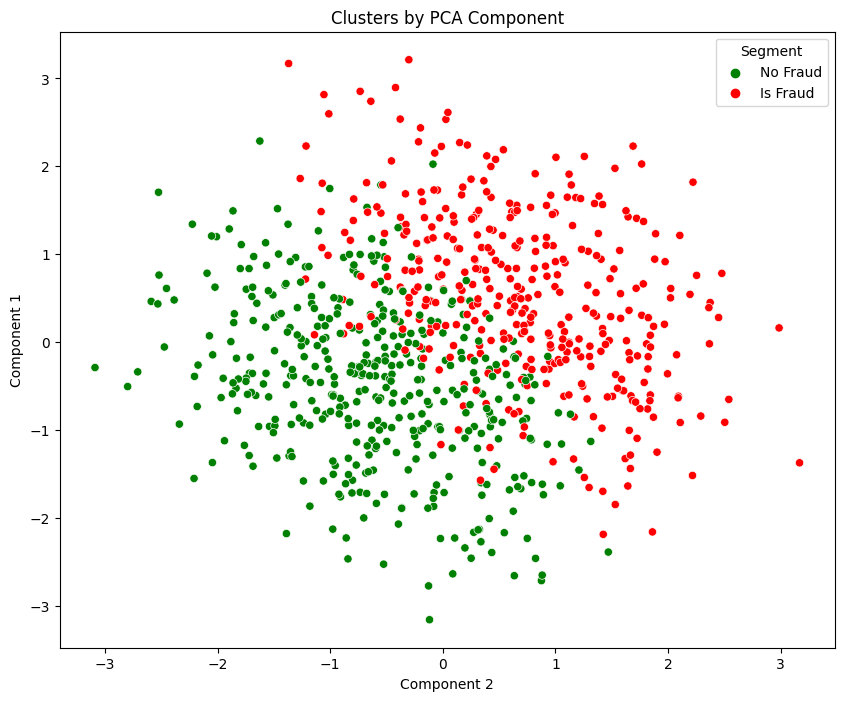

In [ ]:
# plot data by PCA Component, the Y axis is the first compnent, X axis is the second Component.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_pca_kmeans['Segment'], palette=['g','r'])
plt.title('Clusters by PCA Component')
plt.show()

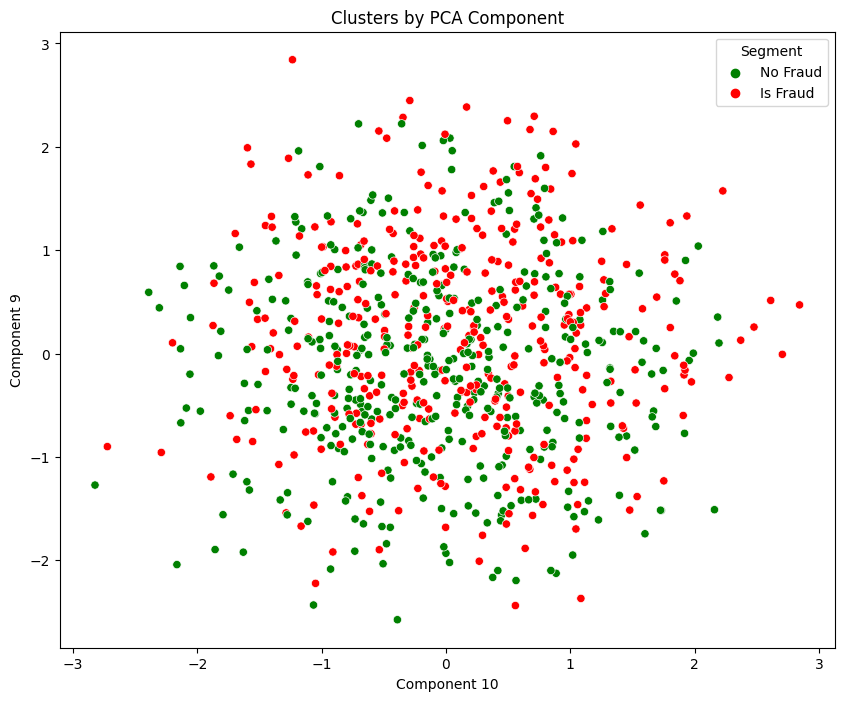

In [ ]:
# plot data by PCA Component, the Y axis is the first compnent, X axis is the second Component.
x_axis = df_segm_pca_kmeans['Component 10']
y_axis = df_segm_pca_kmeans['Component 9']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_segm_pca_kmeans['Segment'], palette=['g','r'])
plt.title('Clusters by PCA Component')
plt.show()


 performing k-means clustering with PCA using cross-validation

In [ ]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Create a pipeline for PCA and k-means clustering
pipeline = Pipeline([
    ('pca', pca),
    ('kmeans', kmeans_pca)
])

# Use cross-validation to evaluate the pipeline
scores = cross_val_score(pipeline, x_train_scaled, cv=5)

# Print the mean and standard deviation of the scores
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

Mean score: -1478.7726241896057
Standard deviation: 20.99618922537319


Skor rata-rata dan deviasi standar dalam validasi silang memberikan perkiraan kinerja model pada data yang tidak terlihat. Dalam hal ini, skor rata-rata -1762,56 menunjukkan bahwa model pengelompokan K-means dengan PCA mampu mengelompokkan data dengan cukup baik. Nilai negatif menunjukkan bahwa model lebih baik daripada baseline, yang sering terjadi pada model pembelajaran tanpa pengawasan. Standar deviasi 21,08 menunjukkan bahwa kinerja model konsisten di seluruh lipatan yang berbeda dalam validasi silang, dan memberikan ukuran variabilitas estimasi kinerja. Standar deviasi yang rendah menunjukkan bahwa kinerja model stabil, sedangkan standar deviasi yang tinggi menunjukkan bahwa kinerja mungkin lebih bervariasi di seluruh subset data yang berbeda.